In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [112]:
chernobylData = pd.read_csv('./data/Chernobyl_ Chemical_Radiation.csv')
chernobylData.head()

,PAYS,Code,Location,Longitude,Latitude,Date,I_131_(Bq/m3),Cs_134_(Bq/m3),Cs_137_(Bq/m3)
0,SE,1,RISOE,12.07,55.7,86/04/27,1,0,0.24
1,SE,1,RISOE,12.07,55.7,86/04/28,0.0046,0.00054,0.00098
2,SE,1,RISOE,12.07,55.7,86/04/29,0.0147,0.0043,0.0074
3,SE,1,RISOE,12.07,55.7,86/04/29,0.00061,0,0.00009
4,SE,1,RISOE,12.07,55.7,86/04/30,0.00075,0.0001,0.00028


In [113]:
chernobylData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PAYS            2051 non-null   object 
 1   Code            2051 non-null   int64  
 2   Location        2051 non-null   object 
 3   Longitude       2051 non-null   float64
 4   Latitude        2051 non-null   float64
 5   Date            2051 non-null   object 
 6   I_131_(Bq/m3)   2031 non-null   object 
 7   Cs_134_(Bq/m3)  1897 non-null   object 
 8   Cs_137_(Bq/m3)  1571 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 144.3+ KB


In [114]:
chernobylData.rename(columns={'I_131_(Bq/m3)': 'Iodine131','Cs_134_(Bq/m3)': 'Cesium134','Cs_137_(Bq/m3)': 'Cesium137'}, inplace=True)
chernobylData.head()

,PAYS,Code,Location,Longitude,Latitude,Date,Iodine131,Cesium134,Cesium137
0,SE,1,RISOE,12.07,55.7,86/04/27,1,0,0.24
1,SE,1,RISOE,12.07,55.7,86/04/28,0.0046,0.00054,0.00098
2,SE,1,RISOE,12.07,55.7,86/04/29,0.0147,0.0043,0.0074
3,SE,1,RISOE,12.07,55.7,86/04/29,0.00061,0,0.00009
4,SE,1,RISOE,12.07,55.7,86/04/30,0.00075,0.0001,0.00028


In [115]:
chernobylData['Date'] = pd.to_datetime(chernobylData['Date'])
chernobylData.head()

,PAYS,Code,Location,Longitude,Latitude,Date,Iodine131,Cesium134,Cesium137
0,SE,1,RISOE,12.07,55.7,1986-04-27,1,0,0.24
1,SE,1,RISOE,12.07,55.7,1986-04-28,0.0046,0.00054,0.00098
2,SE,1,RISOE,12.07,55.7,1986-04-29,0.0147,0.0043,0.0074
3,SE,1,RISOE,12.07,55.7,1986-04-29,0.00061,0,0.00009
4,SE,1,RISOE,12.07,55.7,1986-04-30,0.00075,0.0001,0.00028


In [116]:
chernobylData['PAYS'].value_counts()

IT    303
F     260
DE    246
AU    223
SE    211
CZ    134
NL    121
UK    119
FI    107
NO     73
BE     72
GR     60
ES     44
CH     42
IR     23
HU     13
Name: PAYS, dtype: int64

In [117]:
chernobylData['Location'].value_counts()

ISPRA                 101
KONALA(Helsinki)NW     79
CAPANNA                59
STOCKHOLM              58
VIENNA.                56
                     ... 
WALDHOF                 6
BANSKA                  6
MARCOULE                6
USTI                    5
GRAZ                    4
Name: Location, Length: 95, dtype: int64

In [118]:
chernobylData.isnull().sum()

PAYS           0
Code           0
Location       0
Longitude      0
Latitude       0
Date           0
Iodine131     20
Cesium134    154
Cesium137    480
dtype: int64

In [119]:
chernobylData.replace({'AU': 'Austria','BE': 'Belgium','CH': 'Switzerland','CZ': 'Czechoslovakia','DE': 'Germany','ES': 'Spain','F': 'France','FI': 'Finland','GR': 'Greece','HU': 'Hungary','IR': 'Ireland','IT': 'Italy','NL': 'Netherlands','NO': 'Norway','SE': 'Sweden','UK': 'United Kingdom'},inplace=True)
chernobylData.head()

,PAYS,Code,Location,Longitude,Latitude,Date,Iodine131,Cesium134,Cesium137
0,Sweden,1,RISOE,12.07,55.7,1986-04-27,1,0,0.24
1,Sweden,1,RISOE,12.07,55.7,1986-04-28,0.0046,0.00054,0.00098
2,Sweden,1,RISOE,12.07,55.7,1986-04-29,0.0147,0.0043,0.0074
3,Sweden,1,RISOE,12.07,55.7,1986-04-29,0.00061,0,0.00009
4,Sweden,1,RISOE,12.07,55.7,1986-04-30,0.00075,0.0001,0.00028


In [120]:
chernobylData.drop(['Code'], axis=1, inplace=True)

In [121]:
chernobylData['PAYS'].value_counts()

Italy             303
France            260
Germany           246
Austria           223
Sweden            211
Czechoslovakia    134
Netherlands       121
United Kingdom    119
Finland           107
Norway             73
Belgium            72
Greece             60
Spain              44
Switzerland        42
Ireland            23
Hungary            13
Name: PAYS, dtype: int64

In [122]:
chernobylData['Location'].value_counts()

ISPRA                 101
KONALA(Helsinki)NW     79
CAPANNA                59
STOCKHOLM              58
VIENNA.                56
                     ... 
WALDHOF                 6
BANSKA                  6
MARCOULE                6
USTI                    5
GRAZ                    4
Name: Location, Length: 95, dtype: int64

In [123]:
chernobylData.fillna(np.NAN, inplace=True)

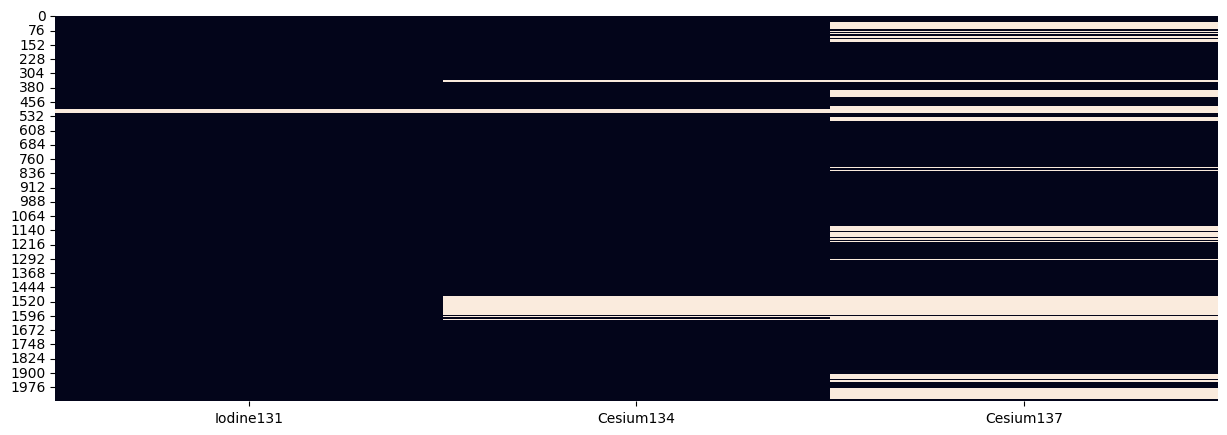

In [124]:
plt.figure(figsize=(15,5))
sns.heatmap(chernobylData[['Iodine131','Cesium134','Cesium137']].isnull(), cbar=False);plt.show()